In [1]:
import numpy as np
from functools import reduce

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import array_to_latex, plot_state_qsphere, plot_bloch_multivector
from qiskit.extensions import Initialize

TOKEN = ''

from qiskit import transpile
from qiskit.providers.aer import QasmSimulator

from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

from qiskit.visualization import plot_histogram

In [2]:
IBMQ.save_account(TOKEN)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

configrc.store_credentials:WARNING:2022-04-22 21:56:24,221: Credentials already present. Set overwrite=True to overwrite.


# Deutsch

## Deutsch function gate

In [3]:
def deutsch_function_gate(f=1):
    circuit = QuantumCircuit(2, name='deutsch gate')
    if f == 0:
        pass
    elif f == 1:
        circuit.cx(0, 1)
    elif f == 2:
        circuit.x(1)
        circuit.cx(0, 1)
    elif f == 3:
        circuit.x(1)
    else:
        raise ValueError('Wrong f')
    return circuit

### $f_0$

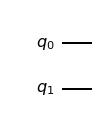

In [4]:
deutsch_function_gate(f=0).draw('mpl')

### $f_1$

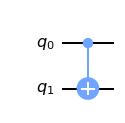

In [5]:
deutsch_function_gate(f=1).draw('mpl')

### $f_3$

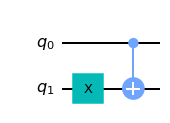

In [6]:
deutsch_function_gate(f=2).draw('mpl')

### $f_3$

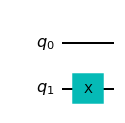

In [7]:
deutsch_function_gate(f=3).draw('mpl')

## Deutsch problem solution

In [8]:
def deutsch_solver_circuit(circuit, deutsch_gate, set_1=True):
    if set_1:
        circuit.x(1)
        circuit.barrier()
    
    circuit.h(0)
    circuit.h(1)
    
    circuit.append(deutsch_gate, [0, 1])
    
    circuit.h(0)
    circuit.h(1)

    return circuit

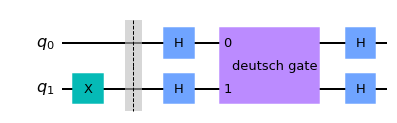

In [9]:
circuit = QuantumCircuit(2)
circuit = deutsch_solver_circuit(circuit, deutsch_function_gate(0))
circuit.draw('mpl')

## $f_0$

In [10]:
circuit = QuantumCircuit(2, 1)
circuit = deutsch_solver_circuit(circuit, deutsch_function_gate(0))
circuit.measure(0, 0)

In [11]:
backend = QasmSimulator()

circuit_compiled = transpile(circuit, backend, optimization_level=3)
job_sim = backend.run(circuit_compiled, shots=1024)
result_sim = job_sim.result()
sim_counts = result_sim.get_counts(circuit_compiled)
print(sim_counts)

{'0': 1024}


In [12]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

circuit_compiled = transpile(circuit, backend, optimization_level=3)

job_real = backend.run(circuit_compiled, shots=1024)
job_monitor(job_real, interval=1)
result_real = job_real.result()
real_counts = result_real.get_counts()
print(real_counts)

least busy backend:  ibmq_santiago
Job Status: job has successfully run
{'0': 1016, '1': 8}


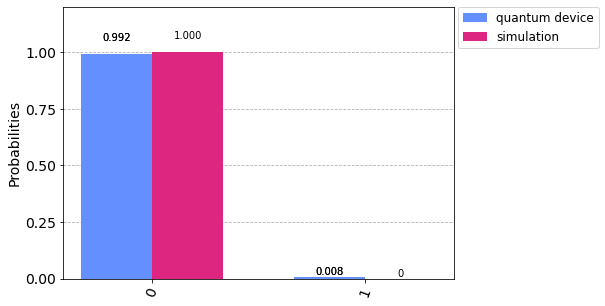

In [13]:
plot_histogram(data=[real_counts, sim_counts], legend=['quantum device', 'simulation'])

## $f_1$

In [14]:
circuit = QuantumCircuit(2, 1)
circuit = deutsch_solver_circuit(circuit, deutsch_function_gate(1))
circuit.measure(0, 0)

In [15]:
backend = QasmSimulator()

circuit_compiled = transpile(circuit, backend, optimization_level=3)
job_sim = backend.run(circuit_compiled, shots=1024)
result_sim = job_sim.result()
sim_counts = result_sim.get_counts(circuit_compiled)
print(sim_counts)

{'1': 1024}


In [16]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

circuit_compiled = transpile(circuit, backend, optimization_level=3)

job_real = backend.run(circuit_compiled, shots=1024)
job_monitor(job_real, interval=1)
result_real = job_real.result()
real_counts = result_real.get_counts()
print(real_counts)

least busy backend:  ibmq_santiago
Job Status: job has successfully run
{'0': 69, '1': 955}


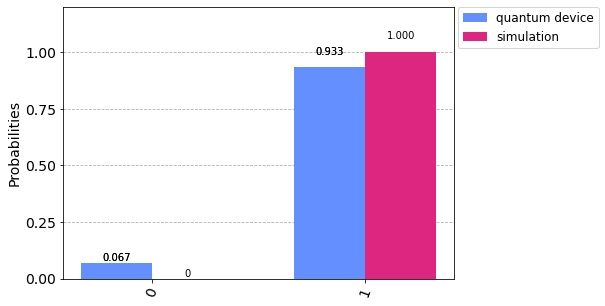

In [17]:
plot_histogram(data=[real_counts, sim_counts], legend=['quantum device', 'simulation'])

## $f_2$

In [18]:
circuit = QuantumCircuit(2, 1)
circuit = deutsch_solver_circuit(circuit, deutsch_function_gate(2))
circuit.measure(0, 0)

In [19]:
backend = QasmSimulator()

circuit_compiled = transpile(circuit, backend, optimization_level=3)
job_sim = backend.run(circuit_compiled, shots=1024)
result_sim = job_sim.result()
sim_counts = result_sim.get_counts(circuit_compiled)
print(sim_counts)

{'1': 1024}


In [20]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

circuit_compiled = transpile(circuit, backend, optimization_level=3)

job_real = backend.run(circuit_compiled, shots=1024)
job_monitor(job_real, interval=1)
result_real = job_real.result()
real_counts = result_real.get_counts()
print(real_counts)

least busy backend:  ibmq_santiago
Job Status: job has successfully run
{'0': 48, '1': 976}


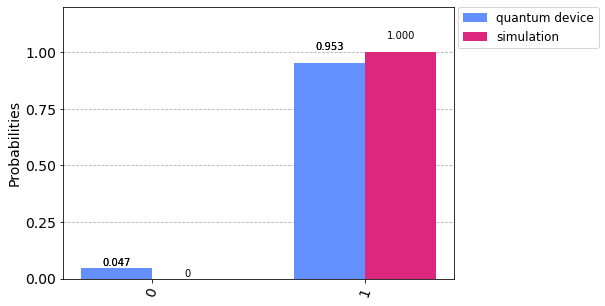

In [21]:
plot_histogram(data=[real_counts, sim_counts], legend=['quantum device', 'simulation'])

## $f_3$

In [22]:
circuit = QuantumCircuit(2, 1)
circuit = deutsch_solver_circuit(circuit, deutsch_function_gate(3))
circuit.measure(0, 0)

In [23]:
backend = QasmSimulator()

circuit_compiled = transpile(circuit, backend, optimization_level=3)
job_sim = backend.run(circuit_compiled, shots=1024)
result_sim = job_sim.result()
sim_counts = result_sim.get_counts(circuit_compiled)
print(sim_counts)

{'0': 1024}


In [24]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

circuit_compiled = transpile(circuit, backend, optimization_level=3)

job_real = backend.run(circuit_compiled, shots=1024)
job_monitor(job_real, interval=1)
result_real = job_real.result()
real_counts = result_real.get_counts()
print(real_counts)

least busy backend:  ibmq_santiago
Job Status: job has successfully run
{'0': 1011, '1': 13}


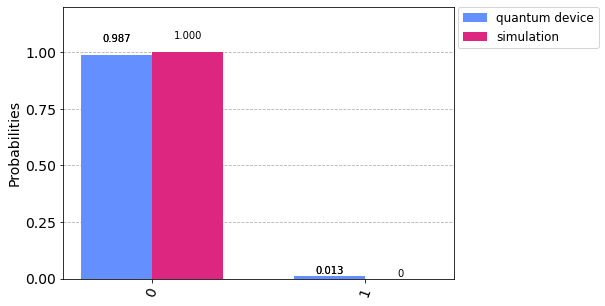

In [25]:
plot_histogram(data=[real_counts, sim_counts], legend=['quantum device', 'simulation'])

# Bernstein-Vazirani

In [26]:
N = 4
A = [0, 1, 0, 1]

## Classical solution

In [27]:
def list_xor(x):
    return reduce(lambda a, b: a ^ b, x)

def f(x):
    return list_xor(np.array(A) * np.array(x))

def classical_sort_bv():
    result_a = [0] * N
    for i in range(N):
        x = [0] * N
        x[i] = 1
        result_a[i] = f(x)
    return result_a
        
found_a = classical_sort_bv()
found_a

[0, 1, 0, 1]

## Quantum solution

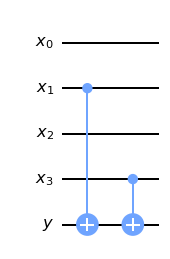

In [28]:
def bf_function_gate():
    x_register = QuantumRegister(N, name='x')
    y_register = QuantumRegister(1, name='y')
    circuit = QuantumCircuit(x_register, y_register, name='bf gate')
    for i in range(N):
        if A[i] == 1:
            circuit.cx(x_register[i], y_register[0])
    return circuit

bf_function_gate().draw('mpl')

In [29]:
def bf_solver_circuit(circuit, bf_gate, set_1=True):
    if set_1:
        circuit.x(N)
        circuit.barrier()
        
    for i in range(N + 1):
        circuit.h(i)
    circuit.barrier()
        
    circuit.append(bf_gate, [i for i in range(N + 1)])
    
    circuit.barrier()
    for i in range(N + 1):
        circuit.h(i)
        
    return circuit

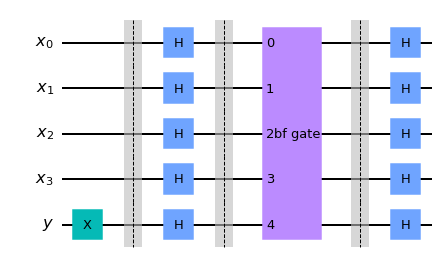

In [30]:
x_register = QuantumRegister(N, name='x')
y_register = QuantumRegister(1, name='y')

circuit = QuantumCircuit(x_register, y_register)
circuit = bf_solver_circuit(circuit, bf_function_gate())
circuit.draw('mpl')

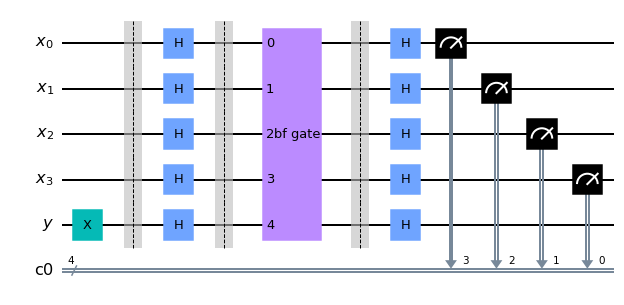

In [31]:
x_register = QuantumRegister(N, name='x')
y_register = QuantumRegister(1, name='y')
classical_register = ClassicalRegister(N)

circuit = QuantumCircuit(x_register, y_register, classical_register)
circuit = bf_solver_circuit(circuit, bf_function_gate())
circuit.measure(x_register, reversed(classical_register))
circuit.draw('mpl')

In [32]:
backend = QasmSimulator()

circuit_compiled = transpile(circuit, backend, optimization_level=3)
job_sim = backend.run(circuit_compiled, shots=1024)
result_sim = job_sim.result()
sim_counts = result_sim.get_counts(circuit_compiled)
print(sim_counts)

{'0101': 1024}


In [33]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= N + 1 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

circuit_compiled = transpile(circuit, backend, optimization_level=3)

job_real = backend.run(circuit_compiled, shots=1024)
job_monitor(job_real, interval=1)
result_real = job_real.result()
real_counts = result_real.get_counts()
print(real_counts)

least busy backend:  ibmq_santiago
Job Status: job has successfully run
{'0000': 15, '0001': 41, '0010': 4, '0011': 10, '0100': 42, '0101': 796, '0110': 4, '0111': 80, '1001': 1, '1010': 1, '1101': 17, '1110': 2, '1111': 11}


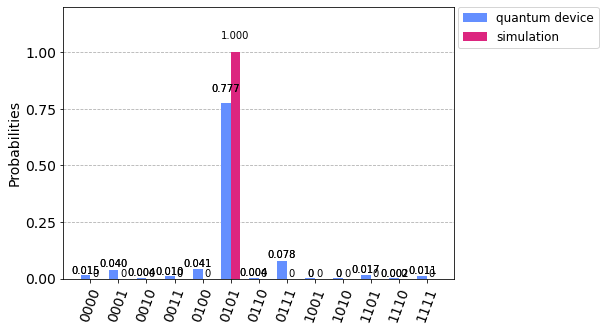

In [34]:
plot_histogram(data=[real_counts, sim_counts], legend=['quantum device', 'simulation'])